Installing dependencies

In [49]:
%%capture
%pip install scipy matplotlib

Importing modules

In [50]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

Reading Wav file

In [51]:

sample_rate, data = wavfile.read('sounds/Alesis-Fusion-Acoustic-Bass-C2.wav')
left_data = data[:, 0]
print(f"number of samples = {data.shape[0]}")
data

number of samples = 127782


<ipython-input-51-43b3774cd2e6>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('sounds/Alesis-Fusion-Acoustic-Bass-C2.wav')


array([[-127, -145],
       [-126, -135],
       [-149, -176],
       ...,
       [   5,    0],
       [  -5,    2],
       [   2,   -4]], dtype=int16)

In [52]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')


sample len: 2.897551020408163s


The waveform

''

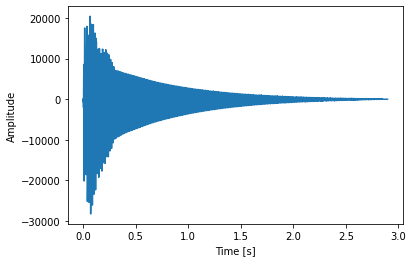

In [53]:
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")
time = np.linspace(0., length, left_data.shape[0])
pl.plot(time, left_data)
;

the frequency domain of the first frame

''

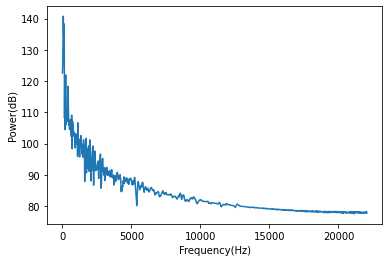

In [54]:
p = 20*np.log10(np.abs(np.fft.rfft(left_data[0:2048])))
f = np.linspace(0, sample_rate/2.0, len(p))

pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.plot(f, p)
;

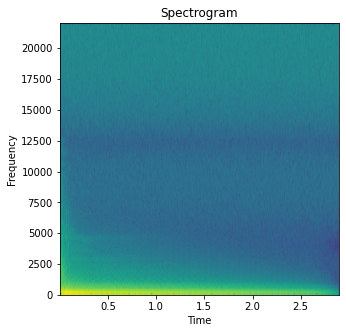

In [55]:
plt.figure(figsize=(5,5))

plt.title('Spectrogram')
plt.specgram(left_data,Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<ipython-input-56-0260cee8855c>:3: RuntimeWarning: divide by zero encountered in log10
  full_fft_data = [20*np.log10(np.abs((np.fft.rfft(left_data[start_range:start_range + 2048]))))


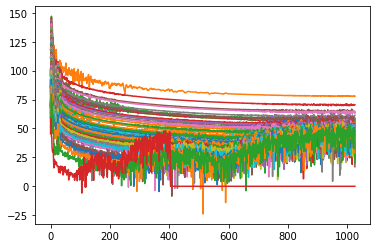

''

In [56]:
import matplotlib.animation as animation

full_fft_data = [20*np.log10(np.abs((np.fft.rfft(left_data[start_range:start_range + 2048]))))
  for start_range in range(0, left_data.shape[0], 2048)]


# windows = [arr * np.hamming(arr.shape[0]) for arr in full_fft_data]
padded = [np.pad(arr, (0, full_fft_data[0].shape[0] - arr.shape[0])) for arr in full_fft_data]

stack = np.stack(padded)

fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

x = np.linspace(0, stack.shape[1], stack.shape[1])
for frame in stack:
    line, = ax.plot(x, frame)
plt.show()
;

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML



# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)


ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, stack.shape[1], stack.shape[1])
    line.set_data(x, stack[i])
    return (line,)


rc('animation', html='jshtml')
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=62, interval=50, blit=True)

HTML(anim.to_jshtml())

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

(x, y) = np.meshgrid(np.linspace(0, stack.shape[1], stack.shape[1]), np.linspace(0, length, stack.shape[0]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20., azim=-45)



the_plot = ax.plot_surface(x, y, stack / 1000 ,cmap='autumn', shade=True)
ax.set_title('Surface Plot in Matplotlib')
ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
fig.colorbar(the_plot, shrink=0.5, aspect=5)
plt.show()
;